In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

%matplotlib inline
sns.set_style('darkgrid')

In [74]:
df = pd.read_excel(r"C:\Users\Lucky Kreatives\Downloads\udemy_courses.xlsx")

In [75]:
df.head(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [11]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [6]:
df.shape

(3678, 12)

In [12]:
df.info

<bound method DataFrame.info of       course_id                                       course_title  \
0       1070968                 Ultimate Investment Banking Course   
1       1113822  Complete GST Course & Certification - Grow You...   
2       1006314  Financial Modeling for Business Analysts and C...   
3       1210588  Beginner to Pro - Financial Analysis in Excel ...   
4       1011058       How To Maximize Your Profits Trading Options   
...         ...                                                ...   
3673     775618  Learn jQuery from Scratch - Master of JavaScri...   
3674    1088178  How To Design A WordPress Website With No Codi...   
3675     635248                      Learn and Build using Polymer   
3676     905096  CSS Animations: Create Amazing Effects on Your...   
3677     297602  Using MODX CMS to Build Websites: A Beginner's...   

                                                    url  is_paid  price  \
0     https://www.udemy.com/ultimate-investment-bank

In [13]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


# Finding null values


In [14]:
df.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

## Courses Number per Subject

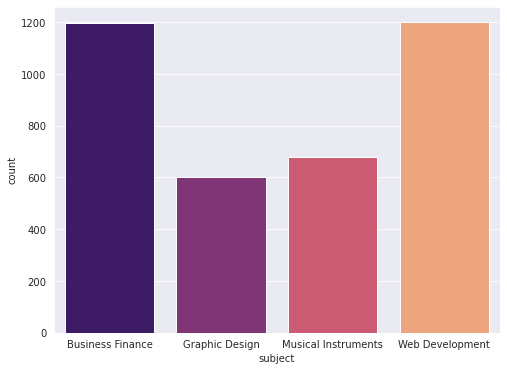

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(df['subject'], palette='magma')

The plot above shows that most of the courses in udemy are either about Web Development, or Business Finance. 



## Subject by subscribers

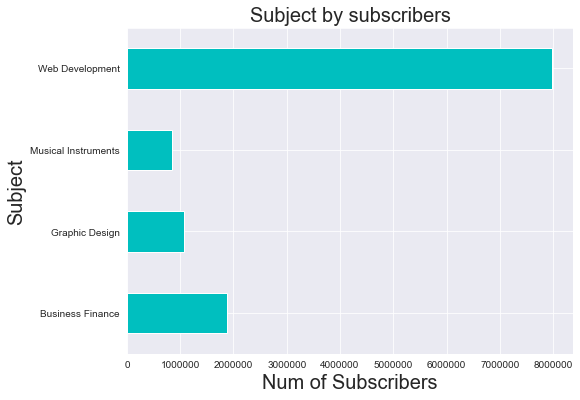

In [80]:
plt.figure(figsize=(8,6))
s = df.groupby('subject').sum()['num_subscribers']
s.plot(kind='barh', color='c')
plt.ylabel('Subject',fontsize = 20)
plt.xlabel('Num of Subscribers', fontsize = 20)
plt.title('Subject by subscribers', fontsize = 20)
plt.ticklabel_format(axis='x', style='plain')
plt.show()

Web development has the highest number of subscribers

In [81]:
df_profit = df
df_profit['organic_profit'] = df['num_subscribers'] * df['price']
df_profit = df_profit.loc[idx[df_profit['organic_profit'].sort_values(ascending=False).index]][['course_title', 'subject', 'organic_profit']]

f=df_profit.head()
figs = make_subplots(rows=1, cols=1)
figs.append_trace(go.Bar(
    x=f['organic_profit'],
    y=f['course_title'],
    orientation='h',
    marker = dict(color=f['organic_profit'].values, coloraxis='coloraxis')
    ), row=1, col=1)
figs['layout'].update(height=400, width=700, title='Top 5 Profitable Courses (in USD)')
figs.show()

There is one Musical courses among the 5 most profitable courses on Udemy. The other four are from WebDev subject

# How big of a role does price plays?

In [93]:
split = df['is_paid'].value_counts().reset_index()
split.columns = ['Is Paid', 'Counts']
fig = px.pie(split, names='Is Paid', values='Counts', width=500)
fig['layout'].update(title='Paid/Free Course Pie Chart')
fig.show()

Most of the courses are paid courses. Thus, 3368 paid courses amounting to 91.6% and 310 free courses amounting to 8.43%

<AxesSubplot:>

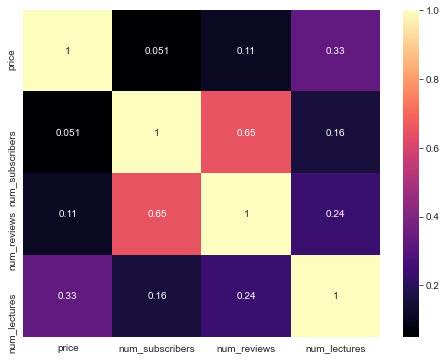

In [84]:

paycorr = df[['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'level']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(paycorr, cmap='magma', annot=True)

In [ ]:
The correlation between price and number of subscribers for each course is very small (0.051). This could mean that most users don't mind paying for a high price as long as the content meets their criteria. 

# Most Popular and Engaging Course

We should be able to sort the most popular course either by number of subscribers, and the most engaging one by number of reviews. 

In [85]:
popular = df.loc[idx[df['num_subscribers'].sort_values(ascending=False).index]][['course_title', 'num_subscribers', 'subject']]
mostpop = popular.head(10)
engage = df.loc[idx[df['num_reviews'].sort_values(ascending=False).index]][['course_title', 'num_reviews', 'subject']]
mosten= engage.head(10)
fig = make_subplots(rows=2 ,cols=1, subplot_titles=('Most Popular Courses', 'Most Engaging Courses'))
fig.append_trace(go.Bar(x=mostpop['num_subscribers'], y=mostpop['course_title'],
                       orientation='h', 
                       showlegend=False), row=1, col=1)
fig.append_trace(go.Bar(x=mosten['num_reviews'], y=mosten['course_title'],
                       orientation='h', 
                       showlegend=False), row=2, col=1)
fig['layout'].update(height=700, width=800)
fig.show()

Pianoforall, the only Musical course in the Top 5 Most Profitable Course, also appears on Top 10 Most Engaging Course as the only course that isn't WebDev.

# Course Levels Importance

Did course levels matter back then? We can try to plot the number of course and subscribers per level to find out about it.

In [49]:
df_level = df[['level', 'num_subscribers', 'course_title']]
subs_level = df_level.groupby('level').sum().reset_index()
course_level = df_level.groupby('level').count().reset_index()

fig = make_subplots(rows=2 ,cols=1, subplot_titles=('Levels v Subscribers', 'Levels v Number of Courses'))
fig.append_trace(go.Bar(x=subs_level['num_subscribers'], y=subs_level['level'],
                       orientation='h', 
                       showlegend=False), row=1, col=1)
fig.append_trace(go.Bar(x=course_level['course_title'], y=course_level['level'],
                       orientation='h', 
                       showlegend=False), row=2, col=1)
fig['layout'].update(height=700, width=800)
fig.show()

Most of the courses are open for All level, then followed by Beginner Levels, Intermediate Level, and finally Expert Level 

In [50]:
norm_level = pd.DataFrame(subs_level['num_subscribers']/course_level['course_title'])
norm_level = pd.concat([subs_level['level'], norm_level], axis=1)
norm_level.columns = ['level', 'subs per course']

In [34]:
fig =px.bar(data_frame=norm_level,x='subs per course', y='level', color='level', title='Subs per Course v Level')
fig.show()

The plot still shows the same level rank as the other 2 plots before, but now with smaller margin between All Level Courses and Beginner Level Courses.

# Course Duration

In [35]:
fig=px.box(df, x='level', y='content_duration', color='level', title='Box Plot of Level v Content Duration')
fig.show()

 Higher level courses seems to be mostly shorter than lower level courses. This means that as your level increases, your required time to comprehend the course decreases

# Relationship between variables 

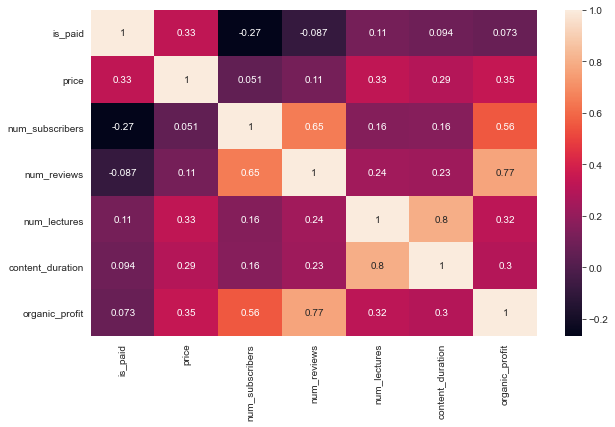

In [92]:
df1 = df.drop(['course_id','url','published_timestamp'], axis=1)
f = df1.corr()
plt.figure(figsize=(10,6))
sns.heatmap(f, annot = True)

plt.show()

This heatmap shows the relationship between the variables. 